# Recurrent Neura Networks

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib as mpl

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

---

# Basic RNN

---

### Generating the Dataset

In [4]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [5]:
np.random.seed(3131)

In [6]:

n_steps = 50

In [7]:
series = generate_time_series(10000, n_steps + 1)

In [8]:
type(series)

numpy.ndarray

In [9]:
series.shape

(10000, 51, 1)

In [10]:
series

array([[[-0.43193367],
        [-0.43273616],
        [-0.36222672],
        ...,
        [-0.11490785],
        [-0.29942003],
        [-0.5103439 ]],

       [[-0.3370712 ],
        [-0.34397614],
        [-0.2388248 ],
        ...,
        [-0.49005726],
        [-0.49329928],
        [-0.49876627]],

       [[ 0.34972113],
        [ 0.19168825],
        [-0.00546702],
        ...,
        [ 0.03762305],
        [ 0.20865645],
        [ 0.31824765]],

       ...,

       [[-0.52839506],
        [-0.44273967],
        [-0.33626077],
        ...,
        [-0.4118119 ],
        [-0.29784194],
        [-0.1202793 ]],

       [[-0.31921288],
        [-0.17804003],
        [-0.08155394],
        ...,
        [ 0.11962369],
        [-0.15246439],
        [-0.30159602]],

       [[-0.32381982],
        [-0.22868574],
        [ 0.00760844],
        ...,
        [-0.31513438],
        [-0.3297655 ],
        [-0.50457907]]], dtype=float32)

In [11]:
# getting data in train set, validate set and test set

X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [12]:
X_train.shape

(7000, 50, 1)

In [13]:
X_valid.shape

(2000, 50, 1)

In [14]:
X_test.shape

(1000, 50, 1)

In [15]:
# Plotting the time series data

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))

plt.show()

In [28]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)



---

### Using Simple RNN

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [18]:
optimizer = keras.optimizers.Adam(lr=0.005)

In [19]:
model.compile(loss="mse", optimizer=optimizer)

In [20]:
result_rnn_1 = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 3s 450us/sample - loss: 0.0985 - val_loss: 0.0469
Epoch 2/20
7000/7000 [==============================] - 2s 291us/sample - loss: 0.0373 - val_loss: 0.0290
Epoch 3/20
7000/7000 [==============================] - 2s 216us/sample - loss: 0.0254 - val_loss: 0.0215
Epoch 4/20
7000/7000 [==============================] - 1s 211us/sample - loss: 0.0198 - val_loss: 0.0176
Epoch 5/20
7000/7000 [==============================] - 2s 216us/sample - loss: 0.0166 - val_loss: 0.0152
Epoch 6/20
7000/7000 [==============================] - 2s 218us/sample - loss: 0.0146 - val_loss: 0.0137
Epoch 7/20
7000/7000 [==============================] - 2s 216us/sample - loss: 0.0132 - val_loss: 0.0126
Epoch 8/20
7000/7000 [==============================] - 1s 212us/sample - loss: 0.0124 - val_loss: 0.0120
Epoch 9/20
7000/7000 [==============================] - 1s 213us/sample - loss: 0.0118 - val_loss: 0.011

In [21]:
model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 84us/sample - loss: 0.0112


0.011170993015170097

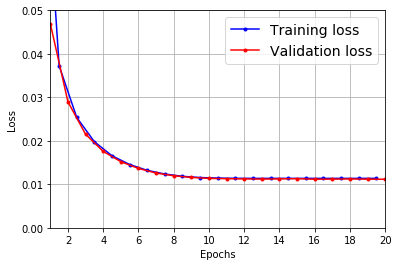

In [31]:
plot_learning_curves(result_rnn_1.history["loss"], result_rnn_1.history["val_loss"])
plt.show()

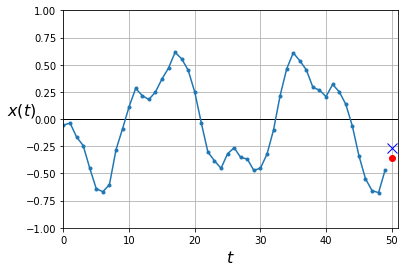

In [22]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

---

# Deep RNN

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
# last layer have a value 1 because we want to find the single output at per time stamp.

# By default, recurrent layers in Keras only return the final output. To make them return one output per time step, 
 # you must set return_sequences = True,

model = keras.models.Sequential([
    
    # getting 20 outputs from this recurrent layer
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [25]:
model.compile(loss="mse", optimizer="adam")

In [26]:
# Training the Model

rnn_deep_1 = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 6s 843us/sample - loss: 0.0498 - val_loss: 0.0109
Epoch 2/20
7000/7000 [==============================] - 4s 626us/sample - loss: 0.0074 - val_loss: 0.0055
Epoch 3/20
7000/7000 [==============================] - 4s 627us/sample - loss: 0.0052 - val_loss: 0.0049
Epoch 4/20
7000/7000 [==============================] - 5s 646us/sample - loss: 0.0046 - val_loss: 0.0044
Epoch 5/20
7000/7000 [==============================] - 4s 637us/sample - loss: 0.0042 - val_loss: 0.0042
Epoch 6/20
7000/7000 [==============================] - 4s 641us/sample - loss: 0.0039 - val_loss: 0.0043
Epoch 7/20
7000/7000 [==============================] - 4s 632us/sample - loss: 0.0038 - val_loss: 0.0040
Epoch 8/20
7000/7000 [==============================] - 5s 645us/sample - loss: 0.0036 - val_loss: 0.0037
Epoch 9/20
7000/7000 [==============================] - 5s 648us/sample - loss: 0.0035 - val_loss: 0.004

In [32]:
model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 158us/sample - loss: 0.0032


0.0032000414431095124

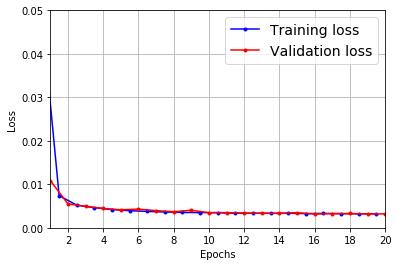

In [33]:
plot_learning_curves(rnn_deep_1.history["loss"], rnn_deep_1.history["val_loss"])
plt.show()

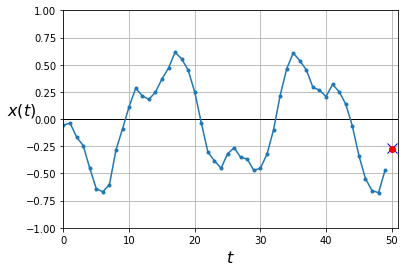

In [34]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

---

# Forecasting Several Steps Ahead

In [35]:
np.random.seed(4323)

In [36]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

In [37]:
Y_pred.shape

(1, 10, 1)

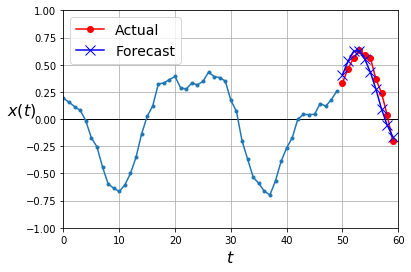

In [38]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)

plt.show()

---

Now let's use this model to predict the next 10 values. We first need to regenerate the sequences with 9 more time steps.

In [39]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

---

Now let's predict the next 10 values one by one:

In [40]:
# RNN for predicting future value, one step at a time

X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    
    # concatenating the predicted value in the existin series
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]

In [41]:
Y_pred.shape

(2000, 10)

In [42]:
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))

0.029988078

---

Let's compare this performance with some baselines: naive predictions and a simple linear model:

In [43]:
# Y_valid is already up there

# The naive approach will give the MSE as 0.223
Y_naive_pred = Y_valid[:, -1:]
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_naive_pred))

0.22278848

In [44]:
# Linear approach to prediction

# This appraoch is better than RNN for predicting one step at a time

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 102us/sample - loss: 0.1348 - val_loss: 0.0610
Epoch 2/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0501 - val_loss: 0.0427
Epoch 3/20
7000/7000 [==============================] - 0s 31us/sample - loss: 0.0388 - val_loss: 0.0356
Epoch 4/20
7000/7000 [==============================] - 0s 31us/sample - loss: 0.0334 - val_loss: 0.0314
Epoch 5/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0299 - val_loss: 0.0286
Epoch 6/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0275 - val_loss: 0.0264
Epoch 7/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0258 - val_loss: 0.0251
Epoch 8/20
7000/7000 [==============================] - 0s 31us/sample - loss: 0.0245 - val_loss: 0.0237
Epoch 9/20
7000/7000 [==============================] - 0s 31us/sample - loss: 0.0235 - val_loss: 0.0229
Epoch 

---

Now let's create an RNN that predicts all 10 next values at once

In [45]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

# MSE of this model is good....

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 4s 572us/sample - loss: 0.0665 - val_loss: 0.0317
Epoch 2/20
7000/7000 [==============================] - 3s 455us/sample - loss: 0.0268 - val_loss: 0.0221
Epoch 3/20
7000/7000 [==============================] - 3s 460us/sample - loss: 0.0188 - val_loss: 0.0166
Epoch 4/20
7000/7000 [==============================] - 3s 446us/sample - loss: 0.0159 - val_loss: 0.0137
Epoch 5/20
7000/7000 [==============================] - 3s 443us/sample - loss: 0.0138 - val_loss: 0.0127
Epoch 6/20
7000/7000 [==============================] - 3s 465us/sample - loss: 0.0132 - val_loss: 0.0117
Epoch 7/20
7000/7000 [==============================] - 3s 451us/sample - loss: 0.0119 - val_loss: 0.0117
Epoch 8/20
7000/7000 [==============================] - 3s 448us/sample - loss: 0.0115 - val_loss: 0.0119
Epoch 9/20
7000/7000 [==============================] - 3s 447us/sample - loss: 0.0110 - val_loss: 0.011

In [46]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

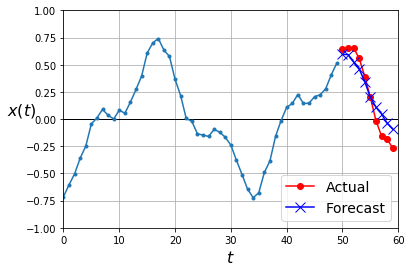

In [47]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

---

Now let's create an RNN that predicts the next 10 steps at each time step. That is, instead of just forecasting time steps 50 to 59 based on time steps 0 to 49, it will forecast time steps 1 to 10 at time step 0, then time steps 2 to 11 at time step 1, and so on, and finally it will forecast time steps 50 to 59 at the last time step. Notice that the model is causal: when it makes predictions at any time step, it can only see past time steps.

In [48]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [49]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 4s 618us/sample - loss: 0.0498 - last_time_step_mse: 0.0388 - val_loss: 0.0416 - val_last_time_step_mse: 0.0321
Epoch 2/20
7000/7000 [==============================] - 3s 454us/sample - loss: 0.0389 - last_time_step_mse: 0.0282 - val_loss: 0.0378 - val_last_time_step_mse: 0.0307
Epoch 3/20
7000/7000 [==============================] - 3s 477us/sample - loss: 0.0327 - last_time_step_mse: 0.0215 - val_loss: 0.0291 - val_last_time_step_mse: 0.0177
Epoch 4/20
7000/7000 [==============================] - 3s 459us/sample - loss: 0.0291 - last_time_step_mse: 0.0178 - val_loss: 0.0273 - val_last_time_step_mse: 0.0162
Epoch 5/20
7000/7000 [==============================] - 3s 467us/sample - loss: 0.0273 - last_time_step_mse: 0.0154 - val_loss: 0.0260 - val_last_time_step_mse: 0.0143
Epoch 6/20
7000/7000 [==============================] - 3s 458us/sample - loss: 0.0245 - last_time_step_mse: 0.0

In [51]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

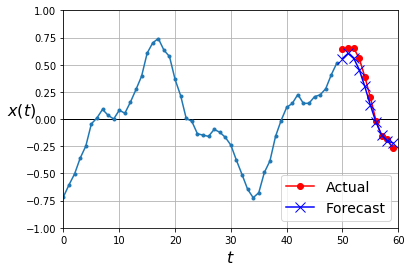

In [52]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

---

# Deep RNN with Batch Norm

---

### Handling long sequneces 

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 5s 681us/sample - loss: 0.1936 - last_time_step_mse: 0.1913 - val_loss: 0.0901 - val_last_time_step_mse: 0.0863
Epoch 2/20
7000/7000 [==============================] - 3s 476us/sample - loss: 0.0531 - last_time_step_mse: 0.0441 - val_loss: 0.0559 - val_last_time_step_mse: 0.0469
Epoch 3/20
7000/7000 [==============================] - 3s 481us/sample - loss: 0.0470 - last_time_step_mse: 0.0374 - val_loss: 0.0453 - val_last_time_step_mse: 0.0354
Epoch 4/20
7000/7000 [==============================] - 3s 468us/sample - loss: 0.0437 - last_time_step_mse: 0.0337 - val_loss: 0.0423 - val_last_time_step_mse: 0.0320
Epoch 5/20
7000/7000 [==============================] - 3s 469us/sample - loss: 0.0414 - last_time_step_mse: 0.0310 - val_loss: 0.0402 - val_last_time_step_mse: 0.0301
Epoch 6/20
7000/7000 [==============================] - 3s 472us/sample - loss: 0.0390 - last_time_step_mse: 0.0

---

# Deep RNNs with Layer Norm

In [54]:
from tensorflow.keras.layers import LayerNormalization

In [55]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = LayerNormalization()
        self.activation = keras.activations.get(activation)
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [56]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.1657 - last_time_step_mse: 0.1622 - val_loss: 0.0743 - val_last_time_step_mse: 0.0699
Epoch 2/20
7000/7000 [==============================] - 7s 984us/sample - loss: 0.0642 - last_time_step_mse: 0.0580 - val_loss: 0.0572 - val_last_time_step_mse: 0.0510
Epoch 3/20
7000/7000 [==============================] - 6s 928us/sample - loss: 0.0546 - last_time_step_mse: 0.0478 - val_loss: 0.0512 - val_last_time_step_mse: 0.0443
Epoch 4/20
7000/7000 [==============================] - 6s 900us/sample - loss: 0.0500 - last_time_step_mse: 0.0430 - val_loss: 0.0484 - val_last_time_step_mse: 0.0415
Epoch 5/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0465 - last_time_step_mse: 0.0390 - val_loss: 0.0434 - val_last_time_step_mse: 0.0355
Epoch 6/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0410 - last_time_step_mse: 0.0313 - 

---

# LSTM

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0760 - last_time_step_mse: 0.0615 - val_loss: 0.0554 - val_last_time_step_mse: 0.0372
Epoch 2/20
7000/7000 [==============================] - 5s 715us/sample - loss: 0.0480 - last_time_step_mse: 0.0281 - val_loss: 0.0423 - val_last_time_step_mse: 0.0211
Epoch 3/20
7000/7000 [==============================] - 5s 720us/sample - loss: 0.0390 - last_time_step_mse: 0.0182 - val_loss: 0.0371 - val_last_time_step_mse: 0.0164
Epoch 4/20
7000/7000 [==============================] - 5s 723us/sample - loss: 0.0350 - last_time_step_mse: 0.0151 - val_loss: 0.0335 - val_last_time_step_mse: 0.0143
Epoch 5/20
7000/7000 [==============================] - 5s 730us/sample - loss: 0.0325 - last_time_step_mse: 0.0136 - val_loss: 0.0314 - val_last_time_step_mse: 0.0124
Epoch 6/20
7000/7000 [==============================] - 5s 722us/sample - loss: 0.0308 - last_time_step_mse: 0.012

In [58]:
model.evaluate(X_valid, Y_valid)

2000/2000 [==============================] - 0s 160us/sample - loss: 0.0240 - last_time_step_mse: 0.0086


[0.02401665338873863, 0.008551412]

In [59]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [60]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

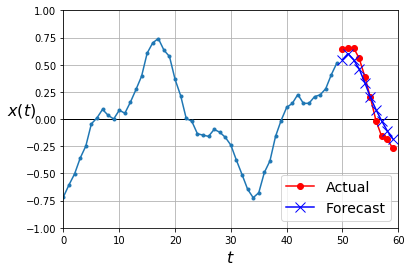

In [61]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

---

# GRU (Gated Recurrent Unit)

In [62]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0742 - last_time_step_mse: 0.0663 - val_loss: 0.0523 - val_last_time_step_mse: 0.0421
Epoch 2/20
7000/7000 [==============================] - 6s 835us/sample - loss: 0.0476 - last_time_step_mse: 0.0367 - val_loss: 0.0441 - val_last_time_step_mse: 0.0327
Epoch 3/20
7000/7000 [==============================] - 6s 852us/sample - loss: 0.0418 - last_time_step_mse: 0.0305 - val_loss: 0.0391 - val_last_time_step_mse: 0.0271
Epoch 4/20
7000/7000 [==============================] - 6s 836us/sample - loss: 0.0373 - last_time_step_mse: 0.0249 - val_loss: 0.0343 - val_last_time_step_mse: 0.0205
Epoch 5/20
7000/7000 [==============================] - 6s 818us/sample - loss: 0.0327 - last_time_step_mse: 0.0179 - val_loss: 0.0313 - val_last_time_step_mse: 0.0158
Epoch 6/20
7000/7000 [==============================] - 6s 814us/sample - loss: 0.0308 - last_time_step_mse: 0.015

In [63]:
model.evaluate(X_valid, Y_valid)

2000/2000 [==============================] - 0s 161us/sample - loss: 0.0241 - last_time_step_mse: 0.0103


[0.024071003690361976, 0.01029832]

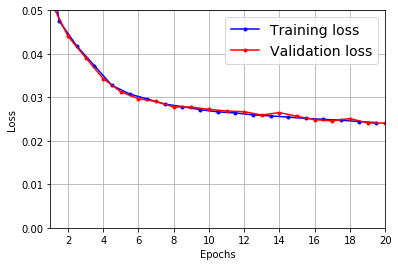

In [64]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [65]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

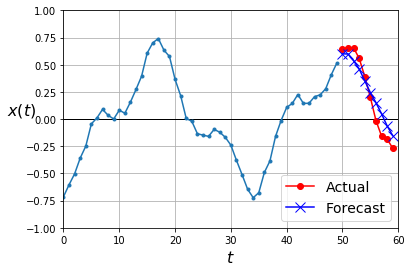

In [66]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

# END

---